In [1]:
import pandas as pd, pickle, re
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

## 일반 카페 글

In [4]:
# 나머지 카페 글 불러오기
df1 = pd.read_csv('depression_book.csv') # 책읽기 카페
df2 = pd.read_csv('depression_girl.csv') # 연애 카페
df3 = pd.read_csv('spec_up_2000.csv') # 스펙업
df4 = pd.read_csv('munhwa_2000.csv') # 문화
df5 = pd.read_csv('powder_2000.csv') # 파우더룸
df6 = pd.read_csv('story.csv') # 자기계발
df7 = pd.read_csv('write.csv') # 글쓰기
df8 = pd.read_csv('eat.csv') # 먹방
df10 = pd.read_csv('ebook.csv') # 이북
df11 = pd.read_csv('story_2.csv') # 자기계발2
df12 = pd.read_csv('fun.csv') # 유머카페
df13 = pd.read_csv('brunch.csv') # 브런치

In [5]:
# null값 제거
df1 = df1.dropna(axis=0)
df2 = df2.dropna(axis=0)
df3 = df3.dropna(axis=0)
df4 = df4.dropna(axis=0)
df5 = df5.dropna(axis=0)
df6 = df6.dropna(axis=0)
df7 = df7.dropna(axis=0)
df8 = df8.dropna(axis=0)
df10 = df10.dropna(axis=0)
df11 = df11.dropna(axis=0)
df12 = df12.dropna(axis=0)
df13 = df13.dropna(axis=0)

In [6]:
# 데이터 프레임 내 a 없애기
def rem(a,df):
    col = list(df.columns)
    for i in col:
        df[i] = df[i].apply(lambda x: re.sub(a,'',x))
    return df

In [7]:
# 광고 올리는 아이디 제거
def bad_del(df4):
    bad = []
    for i in list(df4.index):
        if 'http' in df4.content.loc[i]:
            bad.append(df4.name.loc[i])
    for i in df4['name']:
        if i in bad:
            df4 = df4[df4['name']!=i]
    return df4

In [8]:
# 키워드 포함 열 제거
def key_del(a,df4):
    bad = []
    for i in list(df4.index):
        if a in df4.content.loc[i]:
            bad.append(i)
    df4 = df4.drop(bad, axis = 0)
    return df4

In [9]:
len(df1),len(df2),len(df3),len(df4),len(df5),len(df6),len(df7),len(df8),len(df10),len(df11),len(df12),len(df13)

(1278, 493, 1968, 1988, 1987, 815, 220, 129, 120, 1712, 1477, 672)

In [27]:
# 데이터 프레임 전부 다 합치기
df9 = pd.concat([df1['content'], df2['content'], df3['content'], df4['content'], df11['content'],
                 df5['content'], df6['content'], df7['content'], df8['content'], df10['content'],
                df12['content'], df13['content']],axis = 0)
df9 = pd.DataFrame(df9).reset_index(drop=True)
df9 = df9.rename(columns={0 :'content'})
df9

,content
0,만두를 먹을수있어서 감사합니다
1,내 맘에 들지 않는 사람을 쳐냈었는데 처음으로 손을 내밀어봤습니다. 그 손을 잡아주...
2,버스를탈수있어서 감사합니다
3,삶이 무료해지고 이제 또 즐거운 무언가를 찾고 있었습니다. 또 의미없이 시간 보내는...
4,"붓다의 유언을 읽을 수 있어서 감사했습니다.. “제행이 무상하니, 방일하지 말고 정..."
...,...
12854,(직장인들은 공감할 수 있을 것 같은데) 요즘 나에게하루 중 가장 길게 느껴지는 시...
12855,오랜 시간 동안 네이버 블로그에 글을 적어왔다.일본에서 살기 전에는 일본 여행 관련...
12856,"토요일 아침. 사람들이 주말을 시작하는 풍경은 어떨까? 밀린 늦잠을 자는 사람들도,..."
12857,벌써 르완다 생활이 1년 하고도 5개월.왠지 1년 차는 예전에 지나간 느낌인데 아직...


In [28]:
#띄어쓰기 제거
def rem(a,df):
    col = list(df.columns)
    for i in col:
        df[i] = df[i].apply(lambda x: re.sub(a,'',x))
    return df
rem(' ',df9)

,content
0,만두를먹을수있어서감사합니다
1,내맘에들지않는사람을쳐냈었는데처음으로손을내밀어봤습니다.그손을잡아주어서감사합니다.자존심...
2,버스를탈수있어서감사합니다
3,삶이무료해지고이제또즐거운무언가를찾고있었습니다.또의미없이시간보내는일을찾을수도있었는데좋...
4,"붓다의유언을읽을수있어서감사했습니다..“제행이무상하니,방일하지말고정진하라"""
...,...
12854,(직장인들은공감할수있을것같은데)요즘나에게하루중가장길게느껴지는시간은출퇴근시간이다.매일...
12855,오랜시간동안네이버블로그에글을적어왔다.일본에서살기전에는일본여행관련으로적기시작하다가일본...
12856,"토요일아침.사람들이주말을시작하는풍경은어떨까?밀린늦잠을자는사람들도,벌써하루를준비해나가..."
12857,벌써르완다생활이1년하고도5개월.왠지1년차는예전에지나간느낌인데아직1년6개월이채되지않았...


In [29]:
# 말줄임표 처리

list_dot = ['.'*i for i in range(12, 1, -1)]

def short_1(a,df):
    col = list(df.columns)
    for i in col:
        df[i] = df[i].apply(lambda x: x.replace(a,'말줄임표'))
    return df

def short(df):
    for a in list_dot:
        short_1(a,df)
    return df

In [29]:
short(df9)

,content
0,만두를먹을수있어서감사합니다
1,내맘에들지않는사람을쳐냈었는데처음으로손을내밀어봤습니다.그손을잡아주어서감사합니다.자존심...
2,버스를탈수있어서감사합니다
3,삶이무료해지고이제또즐거운무언가를찾고있었습니다.또의미없이시간보내는일을찾을수도있었는데좋...
4,"붓다의유언을읽을수있어서감사했습니다말줄임표“제행이무상하니,방일하지말고정진하라"""
...,...
12854,(직장인들은공감할수있을것같은데)요즘나에게하루중가장길게느껴지는시간은출퇴근시간이다.매일...
12855,오랜시간동안네이버블로그에글을적어왔다.일본에서살기전에는일본여행관련으로적기시작하다가일본...
12856,"토요일아침.사람들이주말을시작하는풍경은어떨까?밀린늦잠을자는사람들도,벌써하루를준비해나가..."
12857,벌써르완다생활이1년하고도5개월.왠지1년차는예전에지나간느낌인데아직1년6개월이채되지않았...


In [30]:
#리스트로 바꾸기
content=[df9['content'].loc[i] for i in df9.index]

In [31]:
len(content)

12859

In [32]:
# 이상한거 없애기
for i in range(len(content)):
    if '\xa0' in content[i]:
        content[i] = content[i].replace('\xa0','')

for i in range(len(content)):
    if '\n' in content[i]:
        content[i] = content[i].replace('\n','')

for i in range(len(content)):
    if '\t' in content[i]:
        content[i] = content[i].replace('\t','')

In [33]:
# 광고 없애기
hmm = ['com/','http','(주)','eft','EFT','①','전화:','<','부탁드립니다', '어플',
       '장소:','시간:','/','-','%','@','팝니다','팔아요','[','(']

for i in hmm:
    for con in content:
        if i in con:
            content.remove(con)

In [34]:
# 중복된 문장 제거
content = set(content)
content = list(content)
len(content)

8833

In [36]:
df9 = pd.DataFrame(content, columns=['content'])

# 0글자 이하 없애기
df9['len']=df9.content.apply(lambda x: len(x))
df9 = df9[df9['len']>0]

df9.head(5)

,content,len
1,문화의날이라그런지인기검색어에사자랑엑시트가있네용ㅎㅎㅎㅎ무대인사예매한게둘다날짜가겹치기도...,82
2,고속버스타고올라가다내린휴게소.구미휴게소인데휴게소내에요런시설도있네요ㅎㅎ,38
3,1일부터월요일이면.그달이정~말길게느껴지더라고요.특히7월처럼31일이나되면서새까만달은.최악,48
4,저는노포를정말좋아하는데그이유는첫번째오래된집은맛에서실패할확률이적고두번째로는그세월이주는...,142
5,이시간전남비바람이몰아칩니다.ㅋㅋ.......낼일있는데..시끄러워서잠도안오고...아침...,61


In [37]:
len(df9)

8832

In [38]:
df9['label']=0

In [39]:
df9.to_csv('normal.csv',index=False)

# 우울증 카페 글

In [40]:
#우울증 카페 글 불러오기
df1 = pd.read_csv('depression_jook.csv') 
df2 = pd.read_csv('depression_NLP_2.csv') 
df3 = pd.read_csv('depression__memo.csv') 
df4 = pd.read_csv('search_naver4.csv') 
df5 = pd.read_csv('Dep_cafe_crawling_hk.csv') 
df6 = pd.read_csv('search_naver_2.csv') 
df7 = pd.read_csv('depression_newlife.csv') 
df8 = pd.read_csv('depression_newlifememo.csv') 
df10 = pd.read_csv('depression_feelingdep.csv') 
df11 = pd.read_csv('depression_depinsomnia.csv') 

In [41]:
len(set(list(df4['content'])))

1934

In [42]:
len(df1),len(df2),len(df3),len(df4),len(df5),len(df6),len(df7),len(df8)

(1613, 616, 1977, 3463, 23928, 726, 7113, 749)

In [53]:
df0 = pd.concat([df1['content'],df2['content'],df3['content'],df4['content'],df10['content'],df11['content'],
                 df5['content'],df6['content']],axis=0)
df0=df0.dropna()
df0 = pd.DataFrame(df0).reset_index(drop=True)
df0

,content
0,일어나자마자. 살기 싫은 하루.. 이럴줄 알았지만 ㅎㅎ
1,내가 없어져도 해는 매일 뜨겠죠..
2,"선택의 후회,,"
3,오늘도 살아야하네...에휴...
4,니가 하고 싶은대로 행동하면난 어쩌란거니?도대체 어느 장단에 마춰야할지 모르겠어.이...
...,...
33807,"이게 우울증인지 뭔지 모르겠어서,,,, 예전에 상담 클리닉 다니면서 상담도 받았는데..."
33808,안녕하세요 24살 여자입니다 고등학교 졸업 후 바로 부모님회사에서 일을 시작하게 되...
33809,"제 친구가 있는데요.. 친구관계때문에 많이 힘든가봐요수업시간에 공책에 ""우울감=>우..."
33810,"제가 우울증이 있는데..답변1글자크기 조절, 질문하기, 답변쓰기 메뉴제가 원래는 누..."


In [54]:
rem(' ',df0)
short(df0)

,content
0,일어나자마자.살기싫은하루말줄임표이럴줄알았지만ㅎㅎ
1,내가없어져도해는매일뜨겠죠말줄임표
2,"선택의후회,,"
3,오늘도살아야하네말줄임표에휴말줄임표
4,니가하고싶은대로행동하면난어쩌란거니?도대체어느장단에마춰야할지모르겠어.이래도저래도난너한...
...,...
33807,"이게우울증인지뭔지모르겠어서,,,,예전에상담클리닉다니면서상담도받았는데조금좋아졌다가요새..."
33808,안녕하세요24살여자입니다고등학교졸업후바로부모님회사에서일을시작하게되었어요2년6개월동안...
33809,"제친구가있는데요말줄임표친구관계때문에많이힘든가봐요수업시간에공책에""우울감=>우울증""이라..."
33810,"제가우울증이있는데말줄임표답변1글자크기조절,질문하기,답변쓰기메뉴제가원래는누가봐도밝고활..."


In [55]:
content=list(df0['content'])

In [56]:
# 중복된 문장 제거
content = set(content)
content = list(content)
len(content)

31186

In [57]:
# 이상한거 없애기
for i in range(len(content)):
    if '\xa0' in content[i]:
        content[i] = content[i].replace('\xa0','')

for i in range(len(content)):
    if '\n' in content[i]:
        content[i] = content[i].replace('\n','')

for i in range(len(content)):
    if '\t' in content[i]:
        content[i] = content[i].replace('\t','')

In [58]:
# 광고 없애기
hmm = ['com/','<광고>','http','(주)','엄마','친구','동생','언니','누나','오빠','아빠']

for i in hmm:
    for con in content:
        if i in con:
            content.remove(con)

In [59]:
# DataFrame 으로 만들기
df0 = pd.DataFrame(content, columns=['content'])

# 0글자 이하 없애기
df0['len']=df0.content.apply(lambda x: len(x))
df0 = df0[df0['len']>0]

df0.head(5)

,content,len
0,저는이런말을듣고우르르무너졌습니다,17
1,갑자기우울함이몰려든다,11
2,너요즘보기좋더라자꾸배우려고하고노력하는모습이너무예뻐,27
3,우울하지도않고불안한건쬐금있다그닥죽고싶지도살고싶지도않다희안하다충동적인생각이드는건있다가...,127
4,"제가그동안좋아했던여자들의1/3만,,아니1~2명만이라도성공을했더라면,이런상황에웃으며넘...",360


In [60]:
df0[df0['len']>50]

,content,len
3,우울하지도않고불안한건쬐금있다그닥죽고싶지도살고싶지도않다희안하다충동적인생각이드는건있다가...,127
4,"제가그동안좋아했던여자들의1/3만,,아니1~2명만이라도성공을했더라면,이런상황에웃으며넘...",360
5,두달전에공황장애증상으로쓰러지고나서부터는우울증과불안증이와서회사까지그만두게되었습니다말줄...,115
13,잇다약타고오늘은또뭐하지투데이쉐떠뻑투마로우셔터뻑먼데이투데이아플예정sick점점사람들을멀...,131
16,외모지상주의엄청심해요길가다가혹은차에서신호기다리다가아니면식당에서밥먹다가지나가는사람들얼...,69
...,...,...
26354,"우리는아이의부정적인면은교정하고,긍정적인면은강화해나가면더이상삶이우울해있지않고,활력을되...",53
26359,전23살여자구요되도록여성분이었으면좋겠어요많이우울하고힘들어서사람이만나고싶어요저녁식사하...,68
26361,그리고혼자만지내다보니취미또한팝음악감상이나축구경기보기같은지극히혼자만깊게파고들수있는취미...,51
26362,없는사실을있는거처럼꾸며내서저를아주바보로만들었더군요ㅡㅡ그러더니저랑카톡한그남자애는서른살...,113


In [61]:
df0['label'] = 1

In [62]:
df0.to_csv('depression_sum.csv')

## 두 데이터 합치기

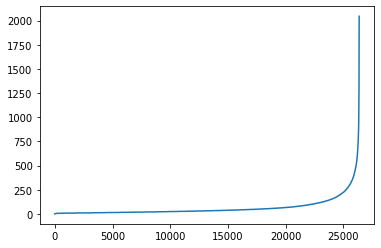

In [63]:
plt.plot(range(len(df0)),df0['len'].T.sort_values()) #글길이 분포 확인

In [64]:
df0.describe() #글길이 분포 확인

,len,label
count,26367.000000,26367.0
mean,64.595858,1.0
std,102.032947,0.0
min,1.000000,1.0
25%,18.000000,1.0
50%,33.000000,1.0
75%,65.000000,1.0
max,2044.000000,1.0


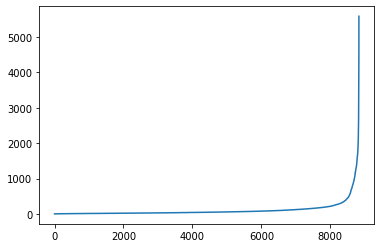

In [65]:
plt.plot(range(len(df9)),df9['len'].T.sort_values()) #글길이 분포 확인

In [66]:
df9.describe() #글길이 분포 확인

,len,label
count,8832.000000,8832.0
mean,109.108243,0.0
std,239.730596,0.0
min,1.000000,0.0
25%,23.000000,0.0
50%,48.000000,0.0
75%,103.000000,0.0
max,5589.000000,0.0


In [67]:
# 200 글자 이상 제거
df9 = df9[df9['len']<200]
df0 = df0[df0['len']<200]

In [68]:
df9

,content,len,label
1,문화의날이라그런지인기검색어에사자랑엑시트가있네용ㅎㅎㅎㅎ무대인사예매한게둘다날짜가겹치기도...,82,0
2,고속버스타고올라가다내린휴게소.구미휴게소인데휴게소내에요런시설도있네요ㅎㅎ,38,0
3,1일부터월요일이면.그달이정~말길게느껴지더라고요.특히7월처럼31일이나되면서새까만달은.최악,48,0
4,저는노포를정말좋아하는데그이유는첫번째오래된집은맛에서실패할확률이적고두번째로는그세월이주는...,142,0
5,이시간전남비바람이몰아칩니다.ㅋㅋ.......낼일있는데..시끄러워서잠도안오고...아침...,61,0
...,...,...,...
8828,오렌만에메일확인했는데.광고대행사한테서메일이몇군대왔네요.안하는게낫겠죠?,38,0
8829,자꾸열받으면먹을려고하고,12,0
8830,다른날들도그렇지만오늘은더욱그림확언이좋네요^^배경음악들도연말분위기를더욱풍성하게해주네요...,77,0
8831,목요일인데아직목감기임,11,0


In [69]:
# 교집합제거
content_0 = [i for i in df0['content']]
content_9 = [i for i in df9['content']]
content_0 = set(content_0)
content_9 = set(content_9)
content_1 = content_0 & content_9
content_0 = list(content_0-content_1)
content_9 = list(content_9-content_1)

In [70]:
len(content_1) # 교집합개수

10

In [71]:
# DataFrame 으로 만들기
df0 = pd.DataFrame(content_0, columns=['content'])

# 0글자 이하 없애기
df0['len']=df0.content.apply(lambda x: len(x))
df0 = df0[df0['len']>0]

df0.head(5)
df0['label'] = 1

In [72]:
df0.to_csv('data_depressed.csv', index = False)

In [73]:
# DataFrame 으로 만들기
df9 = pd.DataFrame(content_9, columns=['content'])

# 0글자 이하 없애기
df9['len']=df9.content.apply(lambda x: len(x))
df9 = df9[df9['len']>0]

df9.head(5)
df9['label'] = 0

In [74]:
df9.to_csv('data_normal.csv', index = False)

In [75]:
len(df0),len(df9)

(24684, 7880)

In [76]:
# 일반글(df9)가 더 많기 때문에 같은 양으로 under-sampling
df0 = df0.sample(7880).reset_index(drop=True)

In [77]:
df9

,content,len,label
0,행복합니다.감사합니다.^^,14,0
1,삶을풍요롭게만드는이에프티톡톡톡!!!.꿀추석을모두잘보내고계시죠?.남은휴일도행복하세요!,46,0
2,문화의날이라그런지인기검색어에사자랑엑시트가있네용ㅎㅎㅎㅎ무대인사예매한게둘다날짜가겹치기도...,82,0
3,고속버스타고올라가다내린휴게소.구미휴게소인데휴게소내에요런시설도있네요ㅎㅎ,38,0
4,1일부터월요일이면.그달이정~말길게느껴지더라고요.특히7월처럼31일이나되면서새까만달은.최악,48,0
...,...,...,...
7875,글하나하나읽어가며느끼는게많은새벽ㅎ.불면증인가잠을못자네다들굿잠이요ㅎ,36,0
7876,다른날들도그렇지만오늘은더욱그림확언이좋네요^^배경음악들도연말분위기를더욱풍성하게해주네요...,77,0
7877,목요일인데아직목감기임,11,0
7878,"결혼한남자가회식할때마다단순직장동료인여자한테잘잘도착했냐,조심히들어가라,쉬어라등등매번카...",79,0


In [78]:
df9.loc[len(df9)]=['기분이좋다',5,0]

In [79]:
df0.loc[len(df0)]=['기분이나쁘다',6,1]

In [80]:
df = pd.concat([df0,df9],axis = 0)
df = df.reset_index(drop = True)
df.head(5)

,content,len,label
0,하나님에대한신앙이최우선이라하지만내눈엔자신의말=하나님의말이라고생각하는거같음,40,1
1,내인생이가장힘들었던건나를무어라설명할수없었기때문이다,27,1
2,저는집이싫습니다,8,1
3,힘이없고우울하다,8,1
4,"제가깨있어도1시반까지하는애인데뭐하나궁금해서나갔더니막마우스클릭소리나는데,화면보면네이버입니다",49,1


In [81]:
df.tail(5)

,content,len,label
15757,다른날들도그렇지만오늘은더욱그림확언이좋네요^^배경음악들도연말분위기를더욱풍성하게해주네요...,77,0
15758,목요일인데아직목감기임,11,0
15759,"결혼한남자가회식할때마다단순직장동료인여자한테잘잘도착했냐,조심히들어가라,쉬어라등등매번카...",79,0
15760,후...워터파크탈의실에서사진찍어대는인간들왜이리많은지모르겠네요.찍으려면지들도수영복벗고...,53,0
15761,기분이좋다,5,0


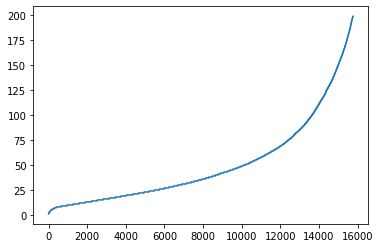

In [82]:
plt.plot(range(len(df)),df['len'].T.sort_values())

## 토크나이저, 인코딩, pad_sequences

In [83]:
_input1 = df['content']
_label = df['label']

In [84]:
cleaning =lambda s: re.sub("[^가-힣a-zA-Z.!?\\s]","",s) # 이모티콘같은거 제거

In [85]:
# 형태소 단위로 토크나이즈
tokenizer = Okt()
_input1 = [ tokenizer.morphs(cleaning(str(sentence))) for sentence in _input1]

In [86]:
_input1

[['하나님',
  '에',
  '대',
  '한',
  '신앙',
  '이',
  '최',
  '우선',
  '이라',
  '하지만',
  '내',
  '눈',
  '엔',
  '자신',
  '의',
  '말',
  '하나님',
  '의',
  '말',
  '이라고',
  '생각',
  '하',
  '는',
  '거',
  '같음'],
 ['내',
  '인생',
  '이',
  '가장',
  '힘들었던건',
  '나를',
  '무어',
  '라',
  '설명',
  '할수',
  '없었기',
  '때문',
  '이다'],
 ['저', '는', '집', '이', '싫습니다'],
 ['힘', '이', '없고', '우울하다'],
 ['제',
  '가',
  '깨있어도',
  '시반',
  '까지',
  '하는',
  '애',
  '인데',
  '뭐',
  '하',
  '나',
  '궁금해서',
  '나갔더니',
  '막',
  '마우스',
  '클릭',
  '소리',
  '나',
  '는데',
  '화면',
  '보면',
  '네이버',
  '입니다'],
 ['내', '인생', '은', '왜', '이럴까', '정말', '빈', '껍데기', '같다', '말줄임표'],
 ['너', '키', '작고', '잘생기지도', '않았어'],
 ['검색',
  '해서',
  '그대로',
  '추천',
  '하지말고',
  '진짜',
  '본인',
  '이',
  '읽어',
  '본',
  '책',
  '을',
  '추천',
  '해주시기',
  '바랍니다',
  '.'],
 ['저', '는', '그건', '자식', '들', '인생', '망치는거라고', '생각', '합니다'],
 ['치료',
  '하다가',
  '좋아져',
  '서단',
  '약했는데',
  '아내',
  '가',
  '좋아진것',
  '같더니',
  '우울증',
  '이',
  '년',
  '만에',
  '다시',
  '또',
  '재발',
  '됐네요',
  '성인',
  'ADHD',
  '치료',
  '방법

In [98]:
#feature 줄이기
num_words=17814

In [99]:
# 인코딩
keras_tokenizer = Tokenizer(num_words=num_words)
#keras_tokenizer = Tokenizer()
keras_tokenizer.fit_on_texts(_input1)
_input = keras_tokenizer.texts_to_sequences(_input1) 

word_dict = keras_tokenizer.word_index # 단어와 인덱스 딕셔너리

max_len = max([len(sentence) for sentence in _input])

In [100]:
len(word_dict)

48238

In [102]:
index_word = keras_tokenizer.index_word

In [103]:
index_word[2061]

'보이지'

In [104]:
max_len

108

In [105]:
_input = pad_sequences(_input, maxlen=max_len, padding='post')
#_label = [ to_categorical(_l) for _l in _label] 

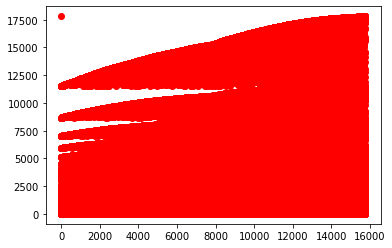

In [106]:
plt.plot(_input, 'ro')
plt.show()

In [107]:
_input[1]

array([   27,   158,     2,   525, 17813,   291, 11519,   168,  1156,
         768,    84,   110,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0])

In [108]:
_label[:10]

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: label, dtype: int64

In [ ]:
#모델에 사용할 변수들 피클 형태로 저장
data = [max_len, num_words+1,keras_tokenizer,_input, _label]
with open('input_data.pickle', 'wb') as handle:
    pickle.dump(data, handle,protocol = pickle.HIGHEST_PROTOCOL)

In [ ]:
#토크나이저 저장
data = [keras_tokenizer, max_len]
with open('word_dict.pickle', 'wb') as handle:
    pickle.dump(data, handle,protocol = pickle.HIGHEST_PROTOCOL)